In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [141]:
import pandas as pd

In [142]:
sitios  = pd.read_csv(r"C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\training_sites_points_raster_value.csv", encoding = 'ISO-8859-1', index_col = [0], sep = ";")


In [143]:
sitios

,Categoria,descripcion,id_clase,geometry,B1,B2,B3,B4,B5,B6,B7
0,Plantacion,NaN,1,POINT (-73.11308347500469 -39.42803928687321),0.002125,0.004902,0.012630,0.007047,0.196165,0.039470,0.014692
1,Plantacion,NaN,1,POINT (-73.11296129010525 -39.428205109236735),0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
2,Plantacion,NaN,1,POINT (-73.1127431027848 -39.428205109236735),0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
3,Plantacion,NaN,1,POINT (-73.11281510460056 -39.42782873610897),0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
4,Plantacion,NaN,1,POINT (-73.1129874725837 -39.42774255211741),0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
...,...,...,...,...,...,...,...,...,...,...,...
119,Bosque Nativo,NaN,2,POINT (-73.07546376639665 -39.370872368780965),-0.001175,0.003830,0.033255,0.014417,0.308021,0.055420,0.018116
120,Bosque Nativo,NaN,2,POINT (-73.07520127700164 -39.370347389990954),-0.002206,0.002634,0.026806,0.012382,0.266496,0.055557,0.020454
121,Bosque Nativo,NaN,2,POINT (-73.07520127700164 -39.370625319938604),-0.001299,0.003459,0.030670,0.013592,0.288675,0.055502,0.018721
122,Bosque Nativo,NaN,2,POINT (-73.075185836449 -39.370864648504636),-0.001175,0.003830,0.033255,0.014417,0.308021,0.055420,0.018116


In [144]:
sitios_num = sitios.iloc[:,-7:]

# Machine Learning Clasification

In [145]:
sitios_num

,B1,B2,B3,B4,B5,B6,B7
0,0.002125,0.004902,0.012630,0.007047,0.196165,0.039470,0.014692
1,0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
2,0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
3,0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
4,0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
...,...,...,...,...,...,...,...
119,-0.001175,0.003830,0.033255,0.014417,0.308021,0.055420,0.018116
120,-0.002206,0.002634,0.026806,0.012382,0.266496,0.055557,0.020454
121,-0.001299,0.003459,0.030670,0.013592,0.288675,0.055502,0.018721
122,-0.001175,0.003830,0.033255,0.014417,0.308021,0.055420,0.018116


# Debemos separar entre las etiquetas y los datos

In [146]:
labels = sitios.loc[:,'id_clase']
features = sitios.loc[:,['B1','B2','B3','B4','B5','B6','B7']]

In [147]:
X_train,X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.25, random_state = 42)

In [148]:
## Partimos por lo simple
dt = DecisionTreeClassifier(criterion= 'gini')
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [149]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [150]:
dt.feature_importances_

array([0.        , 0.        , 0.28194702, 0.71805298, 0.        ,
       0.        , 0.        ])

In [151]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [153]:
dt.max_features_

7

In [154]:
## Validacion

y_pred = dt.predict(X_test)

In [155]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion = confusion_matrix(y_test, y_pred)

In [156]:
confusion

array([[13,  0,  0,  0],
       [ 0,  7,  0,  0],
       [ 0,  0,  5,  0],
       [ 0,  0,  0,  6]], dtype=int64)

In [157]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)

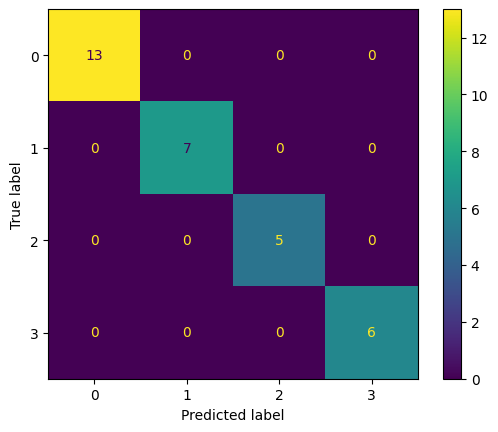

In [158]:
disp.plot()

## Buscando los hiperparametros.

In [159]:
param_distribution = {
    "n_estimators": [10,20,50,70,100],
    "max_features": ["sqrt","log2",None],
    "max_depth": [None, 10,20,30],
    "min_samples_split" : [2,4,8,10],
    "min_samples_leaf" : [1,2,4],
    "bootstrap" : [True, False]
}

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [164]:
X_train # Can we transform this in a array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()


In [165]:
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()

In [166]:
print(f'shape xtrain are {X_train.shape} and shape array X_train_array is {X_train_array.shape}')

shape xtrain are (93, 7) and shape array X_train_array is (93, 7)


In [167]:
X_train.iloc[1,:]

B1    0.022172
B2    0.026242
B3    0.059820
B4    0.044393
B5    0.387647
B6    0.209860
B7    0.094415
Name: 64, dtype: float64

In [168]:
X_train_array[1,:]

array([0.0221725, 0.0262425, 0.05982  , 0.0443925, 0.3876475, 0.20986  ,
       0.094415 ])

In [169]:
# Iniciamos el clasificador vacio

rfc = RandomForestClassifier(random_state = 42)
search = RandomizedSearchCV(rfc, param_distribution, n_iter = 10, cv = 5, random_state = 42)
search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [10, 20, 50, 70, 100]},
                   random_state=42)

In [173]:
# Iniciamos el clasificador vacio

rfc_np = RandomForestClassifier(random_state = 42)
search_np = RandomizedSearchCV(rfc_np, param_distribution, n_iter = 10, cv = 5, random_state = 42)
search_np.fit(X_train_array,y_train_array)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [10, 20, 50, 70, 100]},
                   random_state=42)

In [174]:
search.best_estimator_

RandomForestClassifier(bootstrap=False, max_features=None, min_samples_leaf=2,
                       n_estimators=10, random_state=42)

In [175]:
search_np.best_estimator_

RandomForestClassifier(bootstrap=False, max_features=None, min_samples_leaf=2,
                       n_estimators=10, random_state=42)

In [176]:
best_model = search.best_estimator_
best_model

RandomForestClassifier(bootstrap=False, max_features=None, min_samples_leaf=2,
                       n_estimators=10, random_state=42)

In [177]:
best_model_np = search_np.best_estimator_
best_model_np

RandomForestClassifier(bootstrap=False, max_features=None, min_samples_leaf=2,
                       n_estimators=10, random_state=42)

In [178]:
best_params = search.best_params_
best_params

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': None,
 'bootstrap': False}

In [179]:
best_params_np = search_np.best_params_
best_params_np

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': None,
 'bootstrap': False}

In [180]:
from sklearn.metrics import make_scorer, accuracy_score, classification_report 

In [181]:
print(classification_report(y_train,search.predict(X_train)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        23

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



In [185]:
print(classification_report(y_test_array,search_np.predict(X_test_array)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [182]:
print(classification_report(y_train,dt.predict(X_train)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        23

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



# vamos a hacer las predicciones a partir del modelo entrenadao con los puntos de entrenamiento

In [199]:
import rasterio 

In [200]:
from rasterio.plot import show
from rasterio.plot import show_hist
from matplotlib import pyplot as plt


import geopandas as gpd

In [202]:
full_dataset = rasterio.open(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\clipped_image_7b_ord.tif')


In [203]:
training_sites = gpd.read_file(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\trabajo sitios de entrenamiento\2021\sitios_entrenamient_geo.gpkg', layer = 'sitios_entrenamient_2021' )

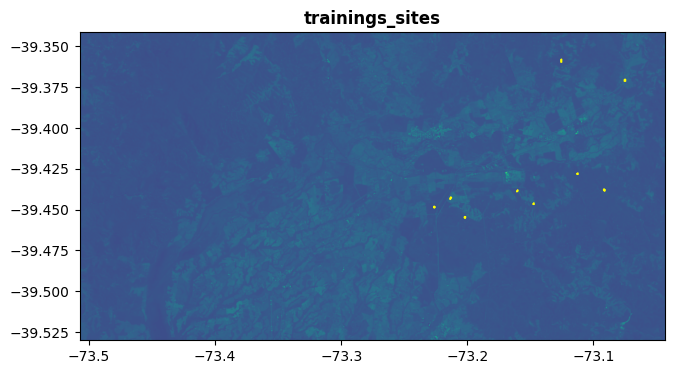

In [204]:
fig, ax1 = plt.subplots(figsize = (10,4))
show(full_dataset, ax = ax1, title = "trainings_sites")
training_sites.plot(ax = ax1, facecolor = 'None', edgecolor = 'yellow')
plt.show()

In [205]:
img_rows, img_cols = full_dataset.shape
print(img_rows,img_cols)
img_bands = full_dataset.count
print(full_dataset.count)

700 1722
7


In [206]:
# We will need a "X" matrix containing our features, and a "y" array containing our labels
print('Our X matrix is sized: {sz}'.format(sz=X_train_array.shape))
print('Our y array is sized: {sz}'.format(sz=y_train_array.shape))

Our X matrix is sized: (93, 7)
Our y array is sized: (93,)


In [207]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_array, y_train_array)

GaussianNB()

In [208]:
search_np

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [10, 20, 50, 70, 100]},
                   random_state=42)

# Tenemos que ajustar la imagen original a una dimension adecuada para utilizar el predict

In [209]:
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.windows import Window
from rasterio.plot import reshape_as_raster, reshape_as_image

In [210]:
clipped_image = rasterio.open(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\clipped_image_7b_ord.tif')

In [211]:
# Leemos la imagen como un vector
img_full = clipped_image.read()  ## 

In [212]:
# Reshape desde array a imagen
reshaped_img_full = reshape_as_image(img_full)
print(reshaped_img_full.shape)

(700, 1722, 7)


In [213]:
class_prediction_gnb = gnb.predict(reshaped_img_full.reshape(-1,7))

In [214]:
class_prediction_rf = search_np.predict(reshaped_img_full.reshape(-1,7))

In [215]:
import numpy as np

In [219]:
from collections import Counter

print(Counter(class_prediction_gnb))
print(Counter(class_prediction_rf))

Counter({2: 643793, 4: 448781, 3: 100081, 1: 12745})
Counter({2: 663524, 3: 413156, 4: 69043, 1: 59677})


In [222]:
# Reshape our classification map back into a 2D matrix so we can visualize it
class_prediction_gnb = class_prediction_gnb.reshape(reshaped_img_full[:,:,0].shape)

In [224]:
class_prediction_gnb

array([[2, 2, 4, ..., 2, 2, 2],
       [2, 2, 4, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [4, 4, 3, ..., 2, 2, 2],
       [2, 2, 4, ..., 2, 2, 2],
       [2, 2, 4, ..., 2, 2, 2]], dtype=int64)

In [226]:
# Reshape our classification map back into a 2D matrix so we can visualize it
class_prediction_rf = class_prediction_rf.reshape(reshaped_img_full[:,:,0].shape)

In [245]:
import numpy as np
import rasterio
from rasterio.transform import from_origin

# Your array

out_meta = full_dataset.meta.copy()
# Define spatial characteristics of output object (basically they are georeferenced)


# Define rasterio dataset characteristics
new_dataset = rasterio.open('class_prediction_rf.tif', 'w', driver='GTiff',
                            height = class_prediction_rf.shape[0], # numpy array shape (row)
                            width = class_prediction_rf .shape[1],  # numpy array shape (col)
                            count=1, dtype=str(class_prediction_rf.dtype),
                            crs='+proj=latlong',
                            transform=transform)

new_dataset.write(class_prediction_rf , 1)
new_dataset.close()

c:\Users\CRISTIAN\anaconda3\envs\spatial_uah\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


In [244]:
class_prediction_rf

array([[2, 2, 3, ..., 2, 2, 2],
       [2, 2, 3, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 3, ..., 2, 2, 2],
       [2, 2, 3, ..., 2, 2, 2],
       [2, 2, 3, ..., 2, 2, 2]], dtype=int64)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your array


# Create a plot with no axes
fig = plt.figure(frameon=False)
plt.axis('off')

# Display the image
plt.imshow(class_prediction_rf, cmap='gray')

# Save the image
plt.savefig('class_prediction_rf.tif', bbox_inches='tight', pad_inches=0)

In [241]:
type(class_prediction_gnb)

numpy.ndarray

In [230]:
def color_stretch(image, index):
    colors = image[:, :, index].astype(np.float64)
    for b in range(colors.shape[2]):
        colors[:, :, b] = rasterio.plot.adjust_band(colors[:, :, b])
    return colors
    
# find the highest pixel value in the prediction image
n = int(np.max(class_prediction_gnb))

# next setup a colormap for our map
colors = dict((
    (0, (0, 0, 255, 255)),   # Blue - Water
    (1, (0,255, 0, 255)),      # Brown - WetSand
    (2, (255, 0, 0, 255)),    # Purple - Emergent Wetland
    (3, (244, 164, 96, 255)),   # Tan - Sand
    
))

# Put 0 - 255 as float 0 - 1
for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v
    
index_colors = [colors[key] if key in colors else 
                (0, 0, 0, 255) for key in range(0, n+1)]

cmap = plt.matplotlib.colors.ListedColormap(index_colors, 'Classification', n+1)

C:\Users\CRISTIAN\AppData\Local\Temp\ipykernel_11636\815349755.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


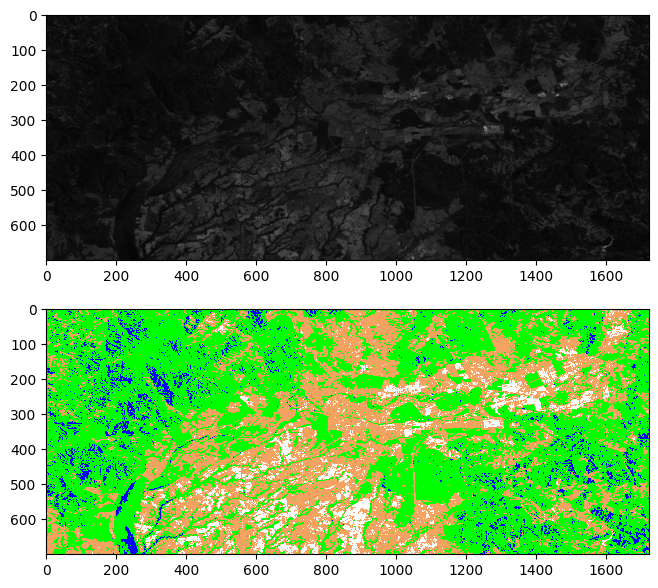

In [234]:
fig, axs = plt.subplots(2,1,figsize=(10,7))

img_stretched = color_stretch(reshaped_img_full, [2, 2, 2])
axs[0].imshow(img_stretched)

axs[1].imshow(class_prediction_rf, cmap=cmap, interpolation='none')



fig.show()

In [251]:
import numpy as np
import rasterio
from rasterio.transform import from_origin

# Your array

out_meta = full_dataset.meta.copy()
# Define spatial characteristics of output object (basically they are georeferenced)
#transform = from_origin(0, 0, 1, 1)

# Define rasterio dataset characteristics
new_dataset = rasterio.open('class_prediction_rf2.tif', 'w', driver='GTiff',
                            height = class_prediction_rf.shape[0], # numpy array shape (row)
                            width = class_prediction_rf.shape[1],  # numpy array shape (col)
                            count=1, dtype=str(class_prediction_rf.dtype),
                            #crs='+proj=latlong',
                            transform=full_dataset.transform)

new_dataset.write(class_prediction_rf, 1)
new_dataset.close()

## Verificamos com podemos exportar esta imagen.

### Ahora por alguna razón vamos a hacer un cliped



In [237]:
clipped_img = full_dataset.read([1,2,3,4,5,6,7])[:, 500:1200, 1000:3000]
print(clipped_img.shape)


(7, 200, 722)


In [250]:
import rasterio

# Assuming 'clipped_img' is your clipped image
# and 'full_dataset' is your original raster dataset

# Update metadata
out_meta = full_dataset.meta.copy()
out_meta.update({
    "driver": "GTiff",
    "height": class_prediction_rf.shape[0],
    "width": class_prediction_rf.shape[1],
    "count": 1,  # Set the number of bands to 4
    "transform": full_dataset.transform
})

# Write the clipped image to disk
with rasterio.open('class_prediction_rf_1.tif', 'w', **out_meta) as dest:
    dest.write(class_prediction_rf)


ValueError: Source shape (700, 1722) is inconsistent with given indexes 1

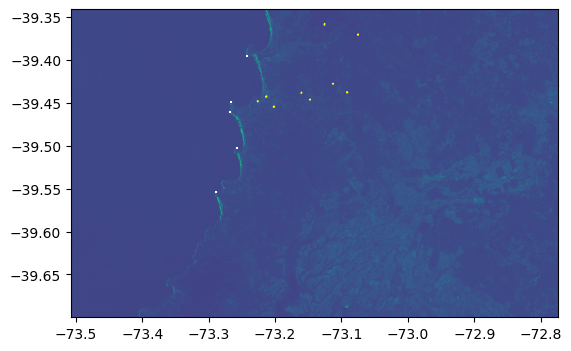

In [62]:
fig, ax = plt.subplots(figsize = (10,4))
show(full_dataset, ax=ax, transform=full_dataset.transform)
training_sites.plot(ax = ax, facecolor = 'None', edgecolor = 'yellow')
plt.show()

## Now our goal is to get the pixels from the raster outlined in each shapefile.

In [5]:
full_dataset = rasterio.open(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\clipped_image.tif')


In [6]:
import geopandas as gpd

In [7]:
training_sites = gpd.read_file(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\trabajo sitios de entrenamiento\2021\sitios_entrenamient_geo.gpkg')

In [172]:
training_sites['class'].unique()

array(['Grassland', 'Forest_Plantation', 'Native_Forest', 'Urban'],
      dtype=object)

In [8]:
training_sites['Classname'] = training_sites['class']

In [9]:
training_sites

,class,geometry,Classname
0,Grassland,"POLYGON ((-73.20228 -39.45427, -73.20225 -39.4...",Grassland
1,Grassland,"POLYGON ((-73.14784 -39.44598, -73.14794 -39.4...",Grassland
2,Forest_Plantation,"POLYGON ((-73.09219 -39.43797, -73.09165 -39.4...",Forest_Plantation
3,Forest_Plantation,"POLYGON ((-73.11304 -39.42759, -73.11334 -39.4...",Forest_Plantation
4,Native_Forest,"POLYGON ((-73.16096 -39.43853, -73.16072 -39.4...",Native_Forest
5,Urban,"POLYGON ((-73.22686 -39.44843, -73.22628 -39.4...",Urban
6,Urban,"POLYGON ((-73.21402 -39.44328, -73.21354 -39.4...",Urban
7,Native_Forest,"POLYGON ((-73.07556 -39.37017, -73.07555 -39.3...",Native_Forest
8,Grassland,"POLYGON ((-73.20226 -39.45427, -73.20224 -39.4...",Grassland
9,Native_Forest,"POLYGON ((-73.12587 -39.35790, -73.12582 -39.3...",Native_Forest


In [10]:
training_sites.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
len(training_sites)

10

# Now we want to extract the geometry of each feature in the shapefile in GeoJSON format:

In [12]:
geoms = training_sites.geometry.values

In [13]:
# Lets grab a single shapely geometry to check 
geometry = geoms[0]
print(type(geometry))
print(geometry)

<class 'shapely.geometry.polygon.Polygon'>
POLYGON ((-73.20228317899202 -39.45427231205459, -73.20224826902074 -39.45507524139381, -73.20150352296697 -39.45509851470799, -73.20143370302443 -39.45430722202587, -73.20228317899202 -39.45427231205459))


In [14]:
# transform to GeoJSON format
# This allows us to easily pass the geometry 
# data to other functions that require it in string format. 
from shapely.geometry import mapping
feature = [mapping(geometry)]
print(type(feature))
print(feature)

<class 'list'>
[{'type': 'Polygon', 'coordinates': (((-73.20228317899202, -39.45427231205459), (-73.20224826902074, -39.45507524139381), (-73.20150352296697, -39.45509851470799), (-73.20143370302443, -39.45430722202587), (-73.20228317899202, -39.45427231205459)),)}]


In [15]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import numpy as np
from shapely.geometry import mapping
from matplotlib import pyplot as plt

In [16]:
# Now let's extract the raster values values within the polygon using the rasterio mask() function

out_image, out_transform = mask(full_dataset, feature, crop = True)


In [17]:
out_transform

Affine(0.00026949458523585647, 0.0, -73.20254469303046,
       0.0, -0.00026949458523585647, -39.45400727852939)

In [18]:
training_sites['class'].unique()


array(['Grassland', 'Forest_Plantation', 'Native_Forest', 'Urban'],
      dtype=object)

# FINAL Building training data

In [19]:
X = np.array([], dtype=np.int8).reshape(0,3) # pixels for training
y = np.array([], dtype=np.string_) # labels for training

In [20]:
with rasterio.open(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\clipped_image.tif') as src:
    band_count = src.count
    for index, geom in enumerate(geoms):
        feature = [mapping(geom)]
        
        # the mask function returs an array of the raster pixels within this feature
        out_image, out_transform = mask(src, feature, crop = True)
        # eliminate all the pixels with 0 values for all 8 bands - AKa not actually part of the shapefile
        out_image_trimmed = out_image[:,~np.all(out_image == 0, axis=0)]
        # eliminate all the pixels with 255 values for all 8 bands - AKA not actually part of the shapefile
        out_image_trimmed = out_image_trimmed[:,~np.all(out_image_trimmed == 255, axis=0)]
        # reshape the array to [pixel count, bands]
        out_image_reshaped = out_image_trimmed.reshape(-1, band_count)
        # append the labels to the y array
        y = np.append(y,[training_sites["Classname"][index]] * out_image_reshaped.shape[0])
        # stack the pizels onto the pixel array
        X = np.vstack((X,out_image_reshaped))

# Pairing Y with X



In [21]:
y.shape

(118,)

In [22]:
X.shape ## Me ha quedado un array de 118, 19 dimensiones

(118, 3)

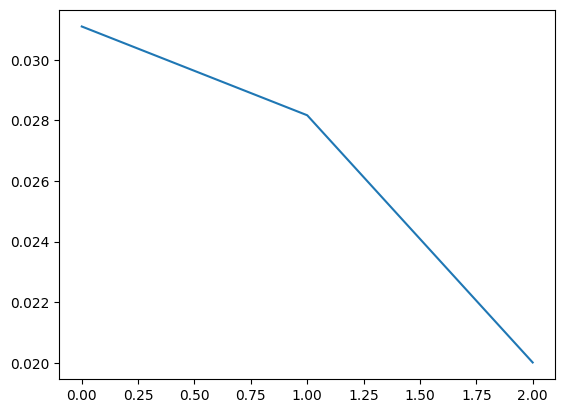

In [23]:
plt.plot(X[3])
plt.show()

# Pairing Y with X

Now that we have the image we want to classify (our X feature inputs), and the land cover labels (our y labeled data), let's check to make sure they match in size so we can feed them to Naive Bayes:

In [24]:
training_sites['Classname'].size

10

In [26]:
# What are our classification labels?

labels = np.unique(training_sites['Classname'])



In [27]:
print('The training data include {n} classes:  {classes}\n'.format(n = training_sites['Classname'].size,
                                                                   classes = labels))


The training data include 10 classes:  ['Forest_Plantation' 'Grassland' 'Native_Forest' 'Urban']



In [28]:
# We will need a "X" matrix containing our features, and a "y" array containing our labels
print('Our X matrix is sized: {sz}'.format(sz=X.shape))
print('Our y array is sized: {sz}'.format(sz=y.shape))

Our X matrix is sized: (118, 3)
Our y array is sized: (118,)


In [29]:
classes = np.unique(y)
band_count = np.arange(1,4)

for class_type in classes:
    band_intensity = np.mean(X[y==class_type, :], axis=0)
    print(band_intensity)
    print(class_type)
    

print(band_count)

[0.02007087 0.02163889 0.02024274]
Forest_Plantation
[0.04185588 0.03704542 0.0360656 ]
Grassland
[0.04358194 0.04257475 0.04136441]
Native_Forest
[0.04938485 0.04854005 0.04783605]
Urban
[1 2 3]


It all looks good! Let's explore the spectral signatures of each class now to make sure they're actually separable since all we're going by in this classification is pixel values.

Text(0.5, 1.0, 'Band Intensities Higher Ref Subset')

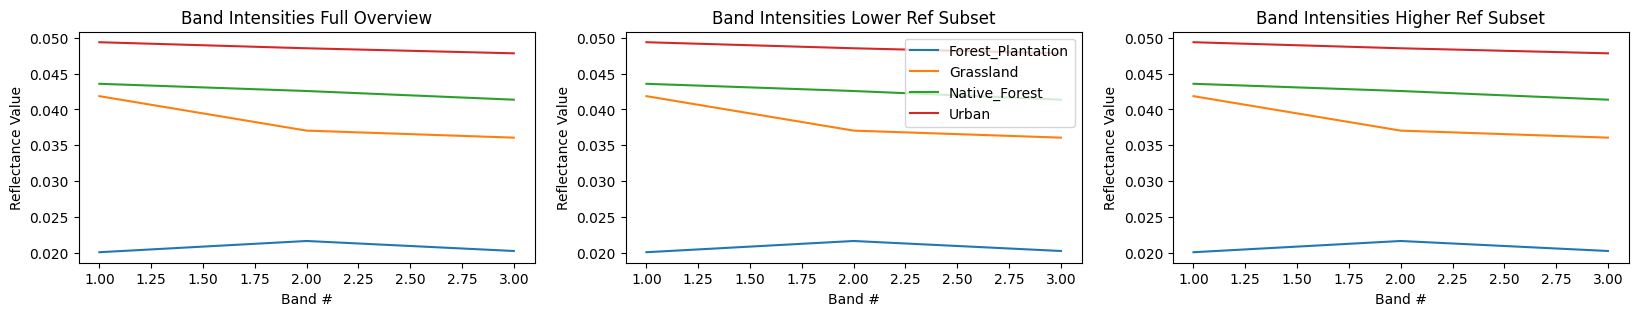

In [30]:
fig, ax = plt.subplots(1,3, figsize=[20,3])

# numbers 1-8
band_count = np.arange(1,4)

classes = np.unique(y)
for class_type in classes:
    band_intensity = np.mean(X[y==class_type, :], axis=0)
    ax[0].plot(band_count, band_intensity, label=class_type)
    ax[1].plot(band_count, band_intensity, label=class_type)
    ax[2].plot(band_count, band_intensity, label=class_type)
# plot them as lines

# Add some axis labels
ax[0].set_xlabel('Band #')
ax[0].set_ylabel('Reflectance Value')
ax[1].set_ylabel('Reflectance Value')
ax[1].set_xlabel('Band #')
ax[2].set_ylabel('Reflectance Value')
ax[2].set_xlabel('Band #')
#ax[0].set_ylim(32,38)
#ax[1].set_ylim(1,100)
#ax[2].set_ylim(70,140)
# ax.set
ax[1].legend(loc="upper right")
# Add a title
ax[0].set_title('Band Intensities Full Overview')
ax[1].set_title('Band Intensities Lower Ref Subset')
ax[2].set_title('Band Intensities Higher Ref Subset')

In [31]:
def str_class_to_int(class_array):
    class_array[class_array == 'Forest_Plantation'] = 0
    class_array[class_array == 'Grassland'] = 1
    class_array[class_array == 'Native_Forest'] = 2
    class_array[class_array == 'Urban'] = 3
    return(class_array.astype(int))

In [32]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

In [33]:
from sklearn.tree import DecisionTreeClassifier
## Partimos por lo simple

dt = DecisionTreeClassifier(criterion= 'gini')
dt.fit(X,y)

DecisionTreeClassifier()

In [34]:
clipped_image = rasterio.open(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\clipped_image.tif')

# Predicting on the image (esto seguramente se puede hacer sin el comando with rasterio.open)
# Probar borrar la memoria de la cache. 

In [35]:
import os

os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'
os.environ['Xfrozen_modules'] = 'off'

In [ ]:
with rasterio.open(clipped_image) as src:
    # may need to reduce this image size if your kernel crashes, takes a lot of memory
    img = src.read()

# Take our full image and reshape into long 2d array (nrow * ncol, nband) for classification
#print(img.shape)
#reshaped_img = reshape_as_image(img)
#print(reshaped_img.shape)

In [ ]:
# Este seguramente se puede

In [ ]:
# Take our full image and reshape into long 2d array (nrow * ncol, nband) for classification
print(img.shape)
reshaped_img = reshape_as_image(img)
print(reshaped_img.shape)